# CS559 Machine Learning: Fundamentals and Applications Spring 2023 HW#2


##   Question 1: Linear Regression with l_2 regularization [80 pts]
In this question, students will implement the ridge (l_2) regularized regression model to predict the real estate cost.  Students must use only NumPy, Stat, Pandas, and Matplotlib in this question
 

### a)	[25 pts] Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 70% and 30% for the training and testing datasets. Please provide an explanation of the performance. Students can make visualizations if necessary. 

#### eda 

In [3138]:
# all imports
import numpy as np
np.random.seed(12)
import matplotlib.pyplot as plt
import pandas as pd



In [3139]:
# load the data 
df_real_estate = pd.read_csv("Real estate.csv",header=0)


In [3140]:
df_real_estate.shape


(414, 8)

In [3141]:
df_real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3142]:
df_real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [3143]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


we noticed that date is as float and we can convert that to int for easier manipulation
same with house age as well 

In [3144]:
df_real_estate['X1 transaction date'] = (df_real_estate['X1 transaction date'].astype(int))
df_real_estate['X2 house age'] = (df_real_estate['X2 house age'].astype(int))

df_real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32,84.87882,10,24.98298,121.54024,37.9
1,2,2012,19,306.59470,9,24.98034,121.53951,42.2
2,3,2013,13,561.98450,5,24.98746,121.54391,47.3
3,4,2013,13,561.98450,5,24.98746,121.54391,54.8
4,5,2012,5,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013,13,4082.01500,0,24.94155,121.50381,15.4
410,411,2012,5,90.45606,9,24.97433,121.54310,50.0
411,412,2013,18,390.96960,7,24.97923,121.53986,40.6
412,413,2013,8,104.81010,5,24.96674,121.54067,52.5


In [3145]:
print(df_real_estate.duplicated().sum() )

0


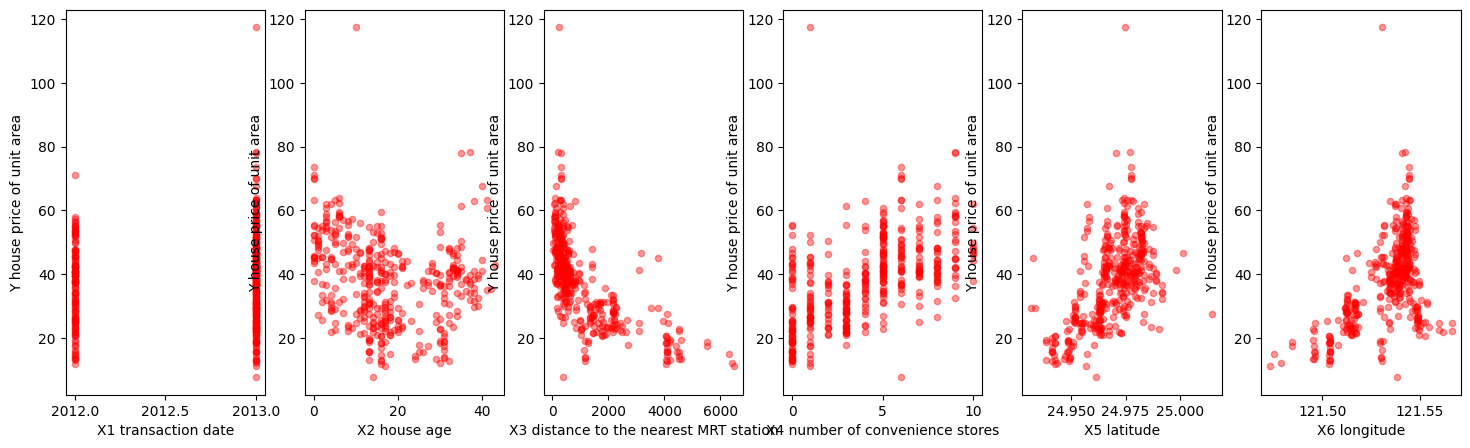

In [3146]:
#to help identify categorical variables create subplots of the features against the price
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18,5))

for xcol, ax in zip(df_real_estate[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']], axes):
    df_real_estate.plot(kind='scatter', x=xcol, y='Y house price of unit area', ax=ax, alpha=0.4, color='r')

there are no categorial data present as such ( transaction date is a possibility but that will depend on the correlation matrix values )

In [3147]:
#checking the distribution
print('Median House Age: ', df_real_estate['X2 house age'].median())
print('Median Price Per Square Foot: $', df_real_estate['Y house price of unit area'].median())

Median House Age:  16.0
Median Price Per Square Foot: $ 38.45


                                              No  X1 transaction date  \
No                                      1.000000             0.007379   
X1 transaction date                     0.007379             1.000000   
X2 house age                           -0.032705             0.050003   
X3 distance to the nearest MRT station -0.013573             0.016519   
X4 number of convenience stores        -0.012699            -0.005586   
X5 latitude                            -0.010110             0.008118   
X6 longitude                           -0.011059             0.013177   
Y house price of unit area             -0.028587             0.081545   

                                        X2 house age  \
No                                         -0.032705   
X1 transaction date                         0.050003   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.024801   
X4 number of convenience stores             0.048855   
X5 lat

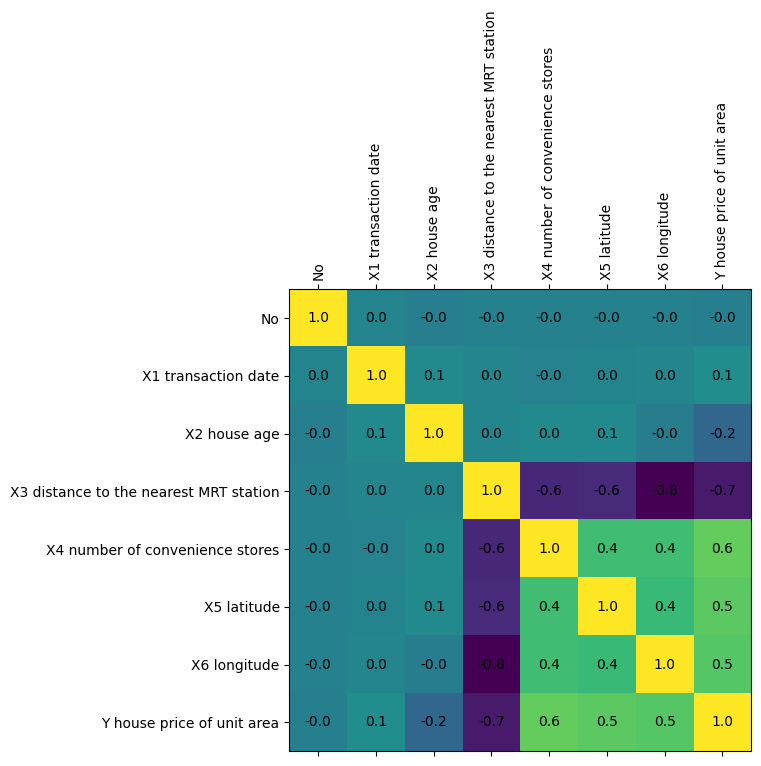

In [3148]:
# correlation matrix
corr_matrix = df_real_estate.corr()
print(corr_matrix)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(corr_matrix)
for (i, j), z in np.ndenumerate(corr_matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


here we can see that as the number of convenience stores or latitude or longitutde increases, the house price of unit area may also tend to increase.

In [3149]:

# Shuffle dataframe using sample function so we get a random sample for training and testing
df_real_estate = df_real_estate.sample(frac=1)
df_real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
407,408,2013,5,2408.99300,0,24.95505,121.55964,22.3
275,276,2012,1,23.38284,7,24.96772,121.54102,49.7
210,211,2013,5,390.56840,5,24.97937,121.54245,52.2
6,7,2012,34,623.47310,7,24.97933,121.53642,40.3
392,393,2013,42,443.80200,6,24.97927,121.53874,35.3
...,...,...,...,...,...,...,...,...
241,242,2013,13,250.63100,7,24.96606,121.54297,41.4
253,254,2012,30,1735.59500,2,24.96464,121.51623,25.9
390,391,2013,32,377.83020,9,24.97151,121.54350,38.6
155,156,2013,13,4082.01500,0,24.94155,121.50381,15.6


#### standardization and scaling
Standardizing the data before training the ridge regression model because regularization methods like ridge regression are sensitive to the scale of the input features. If the features are on different scales, then the regularization term will not be applied uniformly to all features, which could lead to biased coefficients. Therefore, we should standardize the features so that they have zero mean and unit variance.

In [3150]:
# standardization using mean and standard deviation 

X = df_real_estate.drop(['No', 'Y house price of unit area'], axis=1)
y = df_real_estate['Y house price of unit area']
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
y_mean = np.mean(y)
y_std = np.std(y)
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

The ratio of splitting data into training and testing datasets affects model performance. If too little data is used for training, the model may not learn the underlying patterns in the data well and may perform poorly on new data. On the other hand, if too much data is used for training, the model may overfit to the training data and perform poorly on new data.
hence we will split the data in a 70-30 ratio for training - testing purposes

In [3151]:
# Select ratio
ratio = 0.70
 
total_rows = df_real_estate.shape[0]
train_size = int(total_rows*ratio)
 
# Split the data into training and testing sets
X_train_scaled = X_scaled[0:train_size]
y_train_scaled = y_scaled[0:train_size]
X_test_scaled = X_scaled[train_size:]
y_test_scaled = y_scaled[train_size:]


C:\Users\sanje\AppData\Local\Temp\ipykernel_19040\2334804277.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_scaled = y_scaled[0:train_size]
C:\Users\sanje\AppData\Local\Temp\ipykernel_19040\2334804277.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test_scaled = y_scaled[train_size:]


In [3152]:
#checking if shapes are correct 
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_scaled.shape[0] + X_test_scaled.shape[0])


(289, 6)
(125, 6)
414


### b) [40 pts] Define a function model that takes the parameters features, labels, learning rate, lambda (regularization coefficient), epochs, and batch size. This model will perform mini-batch gradient descent. You can initialize random weights using NumPy. Report the mean squared error (MSE) at the end of every epoch. This model is going to return the learned weights. Make a visualization of MSE vs. epoch. 

In [3153]:

def model(features, labels, learning_rate, alpha, epochs, batch_size):
    """
    Performs mini-batch gradient descent with L2 regularization on the input data
    features and the target variable labels to find the weights that minimize the
    mean squared error.
    
    Args:
    - features (ndarray): input data, shape (num_samples, num_features)
    - labels (ndarray): target variable, shape (num_samples,)
    - learning_rate (float): learning rate for gradient descent
    - l2_reg (float): regularization coefficient for L2 regularization
    - epochs (int): number of epochs to run
    - batch_size (int): size of mini-batch
    
    Returns:
    - weights (ndarray): learned weights, shape (num_features,)
    """
    # Initialize random weights
    num_features = features.shape[1]
    weights = np.random.randn(num_features)
    
    # Store the MSE for each epoch
    mse_history = []
    
    # Divide the data into mini-batches
    num_samples = features.shape[0]
    num_batches = num_samples // batch_size
    if num_samples % batch_size != 0:
        num_batches += 1
    
    # Run mini-batch gradient descent
    for epoch in range(epochs):
        mse = 0.0
        for i in range(num_batches):
            #lets set the start and end row number for each batch of data
            start = i * batch_size
            end = (i + 1) * batch_size
            #picking the training data batch 
            X_batch = features[start:end]
            y_batch = labels[start:end]
            #create predictions based on the training data and weights
            y_pred = np.dot(X_batch, weights)
            #calculate the error in prediction
            error = y_pred - y_batch
            #find the mse for the current batch element by element 
            mse += np.sum(error ** 2) / batch_size
            gradient = np.dot(X_batch.T, error) / batch_size
            weights *= (1 - learning_rate * alpha)
            weights -= learning_rate * gradient
            
        mse_history.append(mse / num_batches)
        
    # Plot the MSE vs. epoch
    plt.plot(range(1, epochs+1), mse_history)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.show()
    
    return weights


### c)	[10 pts] Use the weights obtained from the model and predict the output of the test set.

C:\Users\sanje\AppData\Local\Temp\ipykernel_19040\526245452.py:40: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = labels[start:end]


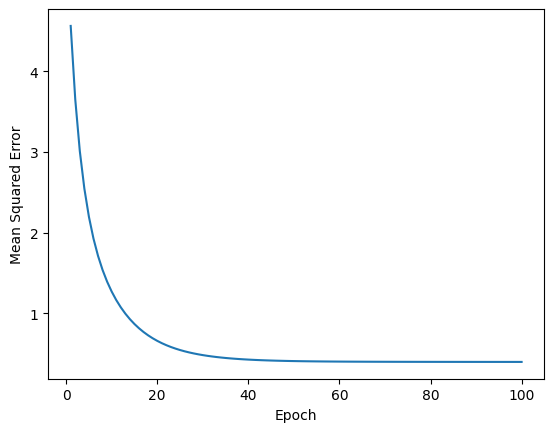

In [3154]:
learning_rate = 0.01
alpha = 1.0
epochs = 100
batch_size = 32
# we will append an array of ones at the end to account for the bias variable w_0 )
X_train_scaled_with_bias =  np.hstack((np.ones((len(X_train_scaled), 1)), X_train_scaled))
weights = model(X_train_scaled_with_bias, y_train_scaled, learning_rate, l2_reg, epochs, batch_size)

In [3155]:
X_test_scaled_with_bias =  np.hstack((np.ones((len(X_test_scaled), 1)), X_test_scaled))
y_pred = np.dot(X_test_scaled_with_bias, weights)


In [3156]:
print("scaled predictions \n",y_pred)


scaled predictions 
 [-0.33231646  0.22346592 -0.74998502  0.32948652 -0.54094258  0.19518759
  0.23685068  1.14260588  0.22397405 -0.63375259 -0.09204552 -1.65794539
  0.6618872  -0.07739198  0.23232069  0.47809866  0.64680495  0.19158388
  0.5994655   0.16126186  0.53514224 -0.34166723  0.71698137  0.28983959
  0.5994655  -0.47755676 -0.23973714 -0.55085965  0.36971163  0.0910438
 -0.25746885  0.75692523 -1.24047329  0.44421763  0.52476172 -1.77118403
 -0.21647785 -0.3135787   0.11212667 -0.40063242  0.12249021 -0.58165634
  0.21854809  0.3386813   1.02055672 -2.66619586  0.14159225  0.32884015
  0.32237801 -0.15529083  0.95934172  0.63176579  0.30960703  0.24084255
  0.73197937 -0.2074076   0.20627085  0.05271555 -1.71368479 -0.36270734
  0.46421303  0.25059978 -1.92179203 -0.90443348 -0.47442933 -0.05620227
  0.64987335  0.11988561 -1.89372834 -0.29141303 -0.05506827 -0.4782826
 -0.90443348 -0.92952885  1.02251019 -0.45761834  0.52061601  0.44114924
  0.65923789  0.25088566 -0.0134

In [3157]:
y_pred_unscaled = y_pred*y_std + y_mean
print("unscaled predictions \n",y_pred_unscaled)

unscaled predictions 
 [33.46399759 41.01710515 27.78786324 42.45792985 30.62875931 40.63280128
 41.19900461 53.50825835 41.02401063 29.36746713 36.72929046 15.44864116
 46.9752699  36.92843277 41.13744182 44.47757545 46.77030154 40.58382675
 46.12695625 40.17174914 45.25280026 33.33692022 47.72400218 41.91912622
 46.12695625 31.49017551 34.7221548  30.4939859  43.00459089 39.2174826
 34.48118006 48.26684102 21.1221057  44.01713075 45.11172853 13.90972288
 35.03824953 33.71864466 39.5039997  32.53558068 39.64484071 30.07545747
 40.95027151 42.58288722 51.84960482  1.74647203 39.9044382  42.44914562
 42.36132486 35.86978388 51.01769019 46.56591862 42.18776666 41.25325428
 47.92782564 35.1615147  40.7834233  38.69659993 14.69114022 33.05098429
 44.28886916 41.38585552 11.8629534  25.68890176 31.5326774  37.21640187
 46.81200115 39.60944406 12.24434029 34.01987715 37.23181297 31.4803113
 25.68890176 25.3478545  51.8761526  31.7611395  45.05538819 43.97543113
 46.93926569 41.38974054 37.79

### d)	[5 pts] Calculate the mean squared error of the prediction.

In [3158]:
mse = np.sum((y_pred - y_test_scaled) ** 2) / len(y_test_scaled)
print("Mean squared error on test set:", mse)

Mean squared error on test set: 0.3938594732401193


## Question 2 : Scikit-learn Ridge regression. [20 pts]

In this question, students will use the Scikit-learn Ridge regression model to predict the real estate cost and compare the results found in Question 1. 

## a)	[10 pts] Now import linear regression from Scikit-learn and train the model.



In [3159]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(X_train_scaled,y_train_scaled)


Ridge()

## b)	[5 pts] Get the prediction on the test set.

In [3160]:
y_pred_ridge = model_ridge.predict(X_test_scaled)



In [3161]:
print("scaled predictions \n",y_pred)

scaled predictions 
 [-0.33231646  0.22346592 -0.74998502  0.32948652 -0.54094258  0.19518759
  0.23685068  1.14260588  0.22397405 -0.63375259 -0.09204552 -1.65794539
  0.6618872  -0.07739198  0.23232069  0.47809866  0.64680495  0.19158388
  0.5994655   0.16126186  0.53514224 -0.34166723  0.71698137  0.28983959
  0.5994655  -0.47755676 -0.23973714 -0.55085965  0.36971163  0.0910438
 -0.25746885  0.75692523 -1.24047329  0.44421763  0.52476172 -1.77118403
 -0.21647785 -0.3135787   0.11212667 -0.40063242  0.12249021 -0.58165634
  0.21854809  0.3386813   1.02055672 -2.66619586  0.14159225  0.32884015
  0.32237801 -0.15529083  0.95934172  0.63176579  0.30960703  0.24084255
  0.73197937 -0.2074076   0.20627085  0.05271555 -1.71368479 -0.36270734
  0.46421303  0.25059978 -1.92179203 -0.90443348 -0.47442933 -0.05620227
  0.64987335  0.11988561 -1.89372834 -0.29141303 -0.05506827 -0.4782826
 -0.90443348 -0.92952885  1.02251019 -0.45761834  0.52061601  0.44114924
  0.65923789  0.25088566 -0.0134

In [3162]:
y_pred_unscaled = y_pred*y_std + y_mean
print("unscaled predictions \n",y_pred_unscaled)

unscaled predictions 
 [33.46399759 41.01710515 27.78786324 42.45792985 30.62875931 40.63280128
 41.19900461 53.50825835 41.02401063 29.36746713 36.72929046 15.44864116
 46.9752699  36.92843277 41.13744182 44.47757545 46.77030154 40.58382675
 46.12695625 40.17174914 45.25280026 33.33692022 47.72400218 41.91912622
 46.12695625 31.49017551 34.7221548  30.4939859  43.00459089 39.2174826
 34.48118006 48.26684102 21.1221057  44.01713075 45.11172853 13.90972288
 35.03824953 33.71864466 39.5039997  32.53558068 39.64484071 30.07545747
 40.95027151 42.58288722 51.84960482  1.74647203 39.9044382  42.44914562
 42.36132486 35.86978388 51.01769019 46.56591862 42.18776666 41.25325428
 47.92782564 35.1615147  40.7834233  38.69659993 14.69114022 33.05098429
 44.28886916 41.38585552 11.8629534  25.68890176 31.5326774  37.21640187
 46.81200115 39.60944406 12.24434029 34.01987715 37.23181297 31.4803113
 25.68890176 25.3478545  51.8761526  31.7611395  45.05538819 43.97543113
 46.93926569 41.38974054 37.79

## c)	[5 pts] Compare the result of your model to that of the Scikit-learn model.


In [3163]:
mse_ridge = mean_squared_error(y_test_scaled, y_pred_ridge)
print("Mean squared error on test set using sklearn ridge :", mse_ridge)
print("Mean squared error on test set using created model :", mse)

Mean squared error on test set using sklearn ridge : 0.39350249446309493
Mean squared error on test set using created model : 0.3938594732401193
